# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
#17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# What factors can help predict if customer will subscribe a term deposit ? 
# Better understanding of the factors can help improve subscription rate.

In [8]:
df = df.drop_duplicates()

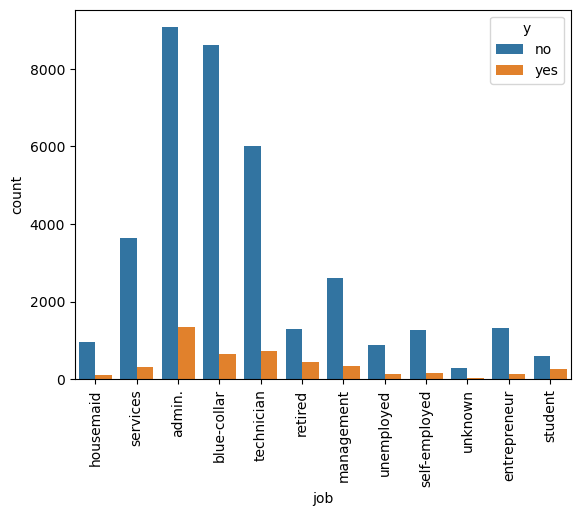

In [9]:
ax = sns.countplot(data = df, x= 'job', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

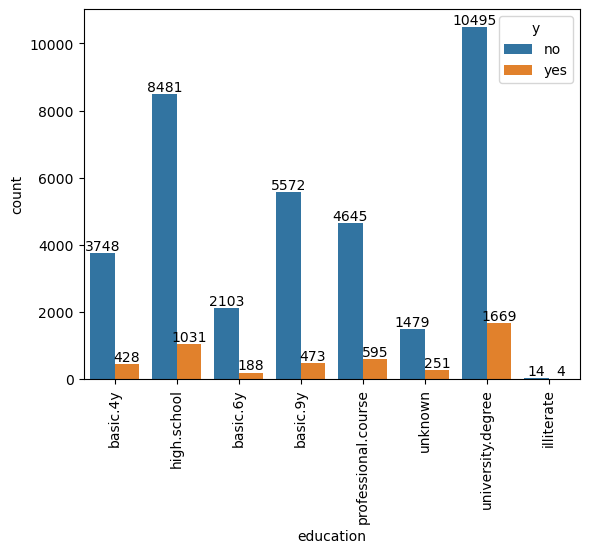

In [10]:
ax = sns.countplot(data = df, x= 'education', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

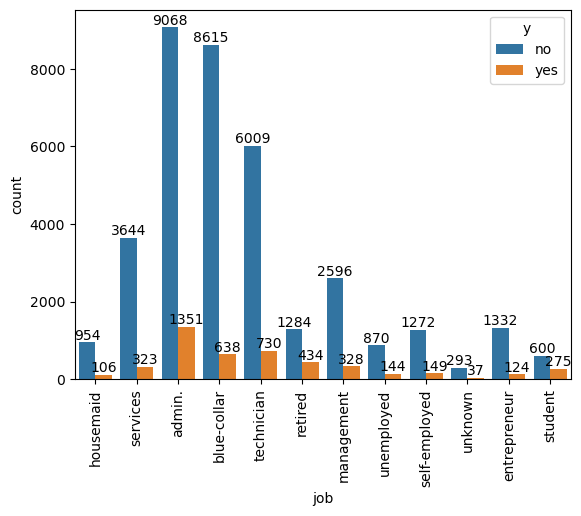

In [11]:
ax = sns.countplot(data = df, x= 'job', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

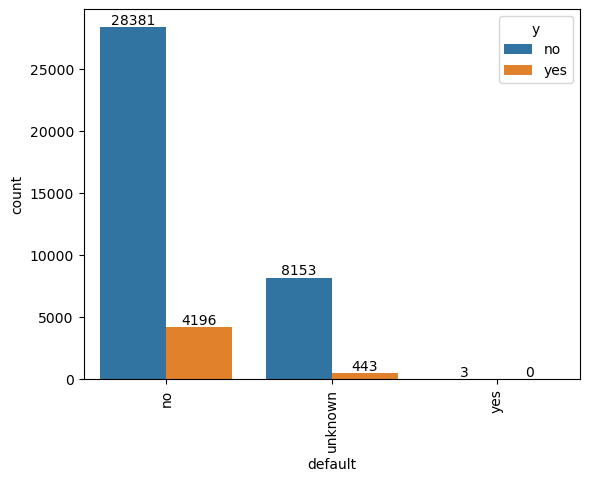

In [12]:
ax = sns.countplot(data = df, x= 'default', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

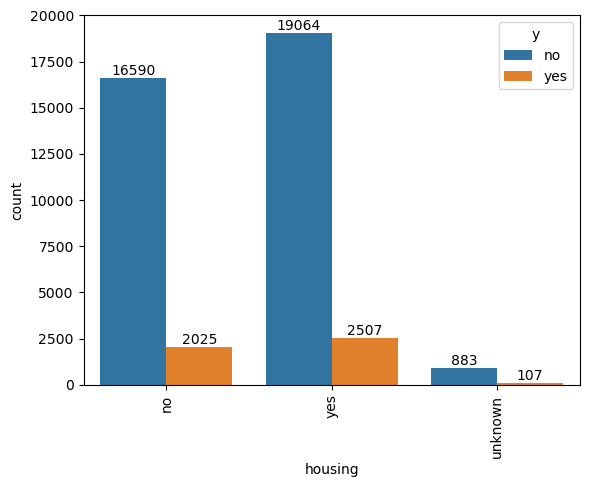

In [13]:
ax = sns.countplot(data = df, x= 'housing', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

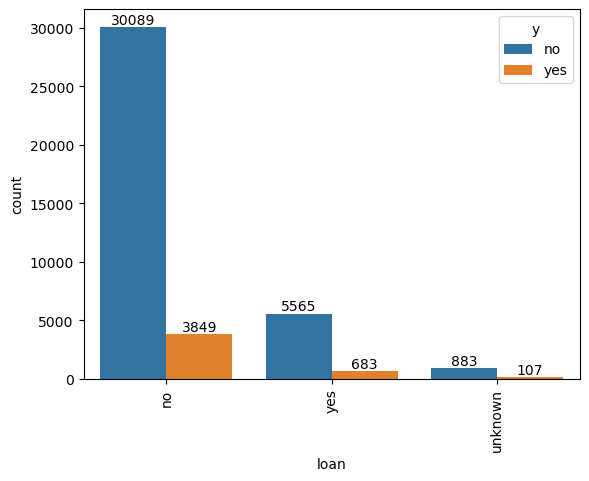

In [14]:
ax = sns.countplot(data = df, x= 'loan', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

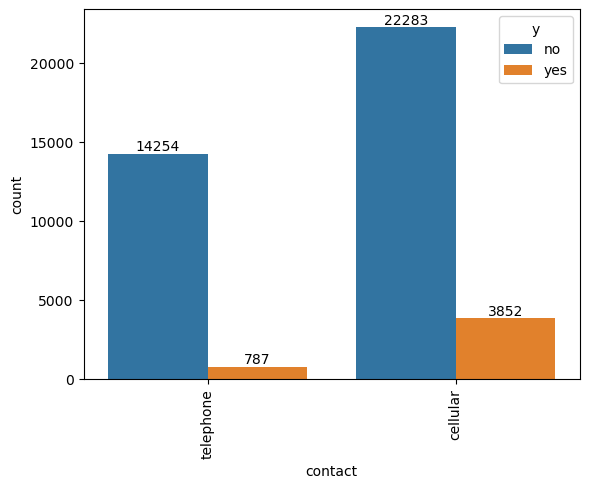

In [15]:
ax = sns.countplot(data = df, x= 'contact', hue = 'y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
for i in ax.containers:
    ax.bar_label(i,)

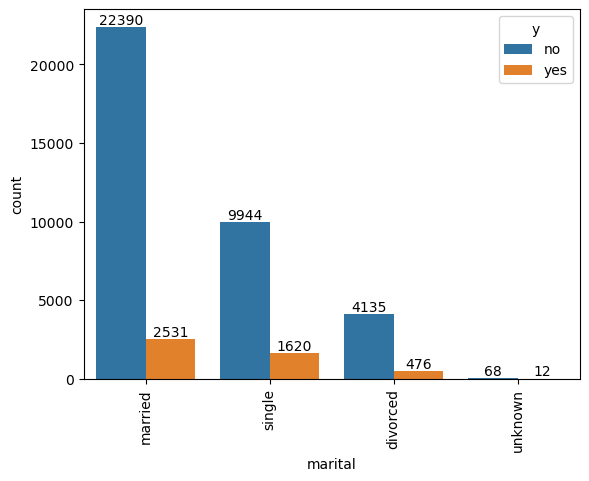

In [16]:
ax = sns.countplot(data = df, x= 'marital', hue = 'y',)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

for i in ax.containers:
    ax.bar_label(i,)

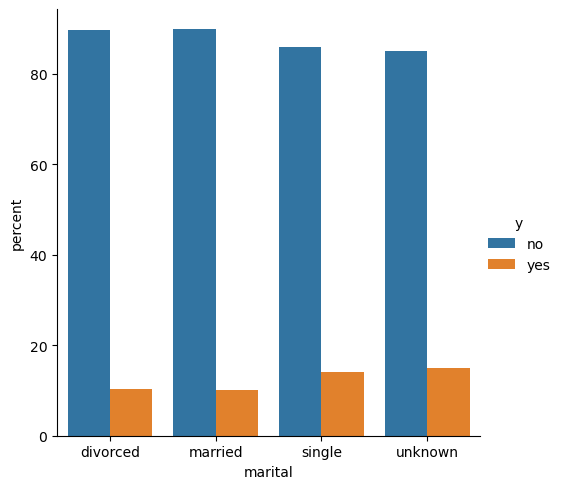

In [17]:
x,y = 'marital','y'
(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [18]:
# Many categorical data has 'unknown' as response and would like to eliminate it from the dataset 

In [19]:
df2 = df[df['marital']!='unknown']
df2 = df2[df2['job']!='unknown']
df2 = df2[df2['education']!='unknown']
df2 = df2[df2['default']!='unknown']
df2 = df2[df2['housing']!='unknown']
df2 = df2[df2['loan']!='unknown']
df2 = df2[df2['contact']!='unknown']

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  duration        30478 non-null  int64  
 11  campaign        30478 non-null  int64  
 12  pdays           30478 non-null  int64  
 13  previous        30478 non-null  int64  
 14  poutcome        30478 non-null  object 
 15  emp.var.rate    30478 non-null  float64
 16  cons.price.idx  30478 non-null  float64
 17  cons.conf.idx   30478 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
obj_col = df2.drop('y',axis = 1).select_dtypes(include=['object']).columns.tolist()

In [22]:
obj_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [23]:
df2.nunique()

age                 76
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1441
campaign            41
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          314
nr.employed         11
y                    2
dtype: int64

In [24]:
j = 0
for i in enumerate(obj_col):
    j = j+df2[i[1]].nunique()

print(j)
# if we encode all parameters of 'object' type there woudl be 47 additional parameters

47


In [25]:
num_col = df2.drop('y',axis = 1).select_dtypes(include = ['int64','float64']).columns.tolist()

In [26]:
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [27]:
df3 = pd.get_dummies(df2, columns = obj_col).drop('y',axis =1)

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30478 non-null  int64  
 1   duration                       30478 non-null  int64  
 2   campaign                       30478 non-null  int64  
 3   pdays                          30478 non-null  int64  
 4   previous                       30478 non-null  int64  
 5   emp.var.rate                   30478 non-null  float64
 6   cons.price.idx                 30478 non-null  float64
 7   cons.conf.idx                  30478 non-null  float64
 8   euribor3m                      30478 non-null  float64
 9   nr.employed                    30478 non-null  float64
 10  job_admin.                     30478 non-null  uint8  
 11  job_blue-collar                30478 non-null  uint8  
 12  job_entrepreneur               30478 non-null 

In [29]:
# y for the dataset to model
y = df2['y']
y = y.replace({'yes': 1, 'no':0})

In [30]:
#df3 = df2.drop('y', axis =1)

In [31]:
df3

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [32]:
# Category transformer
#cat_transformer = ColumnTransformer(transformers = [('cat',OneHotEncoder(), [0,1])],remainder = 'passthrough')
#num_transformer = ColumnTransformer(transformers = [('num', StandardScaler())], remainder = 'passthrough')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df3, y, test_size = 0.25)

In [34]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
36280,34,62,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,...,0,0,0,1,0,0,0,0,1,0
21441,31,51,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
13972,30,252,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,1,0,0,0,0,0,1,0
38691,27,118,1,999,0,-3.4,92.649,-30.1,0.715,5017.5,...,0,0,0,1,0,0,0,0,1,0
36955,59,367,1,999,0,-2.9,92.469,-33.6,1.072,5076.2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28501,46,332,3,999,0,-1.8,93.075,-47.1,1.423,5099.1,...,0,0,0,0,0,1,0,0,1,0
22173,42,168,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
19287,34,165,1,999,0,1.4,93.444,-36.1,4.967,5228.1,...,0,0,0,0,0,0,1,0,1,0
21682,35,211,2,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0


In [35]:
y_train

36280    0
21441    0
13972    0
38691    1
36955    1
        ..
28501    0
22173    0
19287    0
21682    0
33890    0
Name: y, Length: 22858, dtype: int64

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [36]:
# Lets aim to have high correlation coefficient of 0.8+ 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [37]:
import time
start =time.time()
lgr = LogisticRegression().fit(X_train,y_train)
#pipeline = Pipeline(steps=[('prep',col_transform), ('lgr', LogisticRegression())])
#pipeline.fit(X_train,y_train)
end = time.time()
lgr_time = end - start

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lgr.score(X_train,y_train)

0.9001662437658587

In [39]:
#lgr.score(col_transform.fit_transform(X_test),y_test)

In [40]:
#model =  pd.DataFrame({'lgr_coef':lgr.coef_[0],'category': X_train.columns}).set_index('category')

### Problem 9: Score the Model

What is the accuracy of your model?

In [41]:
# Creeating a score Data Frame to add Model score; adding logistic Regression data
score_df = pd.DataFrame({'Model':['lgr'],'Train Time': lgr_time, 'Train Accuracy': lgr.score(X_train,y_train), 'Test Accuracy':lgr.score(X_test,y_test)}).set_index('Model')

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [42]:
# Creating KNN Model

knn = KNeighborsClassifier(n_neighbors=10)
start =time.time()
knn.fit(X_train,y_train)
end = time.time()
knn_time = end - start

In [43]:
score_df2 = pd.DataFrame({'Model':['knn'],'Train Time': knn_time, 'Train Accuracy': knn.score(X_train,y_train), 'Test Accuracy':knn.score(X_test,y_test)}).set_index('Model')

In [44]:
score_df2

,Train Time,Train Accuracy,Test Accuracy
Model,,,
knn,0.012411,0.913684,0.894882


In [45]:
# Adding KNN  data to Score Table
score_df = score_df.append(score_df2)

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\2839911295.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append(score_df2)


In [46]:
from sklearn import tree
dst = tree.DecisionTreeClassifier().fit(X_train,y_train)
start =time.time()
dst.fit(X_train,y_train)
end = time.time()
dst_time = end - start

In [47]:
score_df2 = pd.DataFrame({'Model':['dst'],
                          'Train Time': dst_time,
                          'Train Accuracy': dst.score(X_train,y_train),
                          'Test Accuracy':dst.score(X_test,y_test)}).set_index('Model')

In [48]:
# Adding Decision Tree data to Score Table
score_df = score_df.append(score_df2)

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\366518684.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append(score_df2)


In [49]:
from sklearn.svm import SVC, SVR
start =time.time()
svc = SVC(kernel = 'linear').fit(X_train,y_train)
end = time.time()
svc_time = end - start

In [50]:
score_df2 = pd.DataFrame({'Model':['svc'],
                          'Train Time': svc_time,
                          'Train Accuracy': svc.score(X_train,y_train),
                          'Test Accuracy':svc.score(X_test,y_test)}).set_index('Model')

In [51]:
# Adding SVC data to Score Table 
score_df = score_df.append(score_df2)

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\2150888120.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_df = score_df.append(score_df2)


In [52]:
score_df = score_df.reset_index()

In [53]:
score_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,lgr,0.227318,0.900166,0.898819
1,knn,0.012411,0.913684,0.894882
2,dst,0.132714,1.000000,0.876772
3,svc,77.550910,0.892423,0.891470


<Axes: xlabel='Model', ylabel='Train Time'>

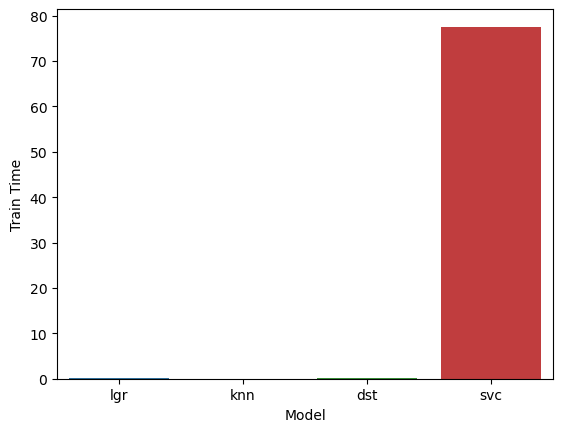

In [54]:
sns.barplot(data = score_df, x = 'Model', y = 'Train Time')

<Axes: xlabel='Model', ylabel='Train Accuracy'>

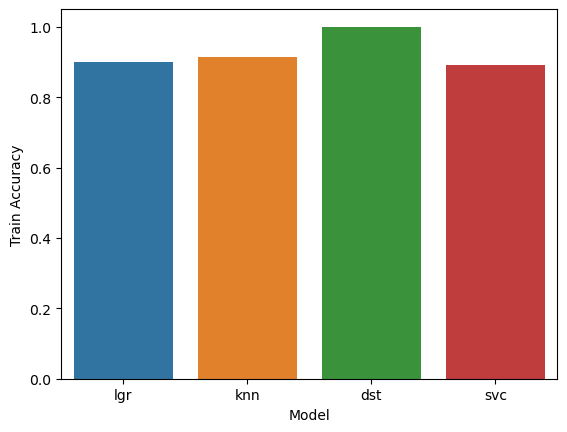

In [55]:
sns.barplot(data = score_df, x = 'Model', y = 'Train Accuracy')

<Axes: xlabel='Model', ylabel='Test Accuracy'>

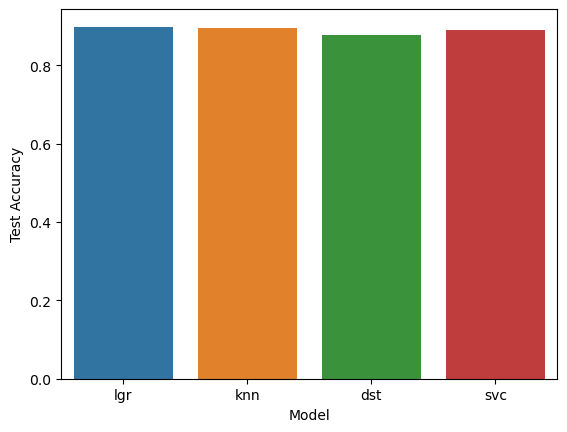

In [56]:
sns.barplot(data = score_df, x = 'Model', y = 'Test Accuracy')

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\1738403036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

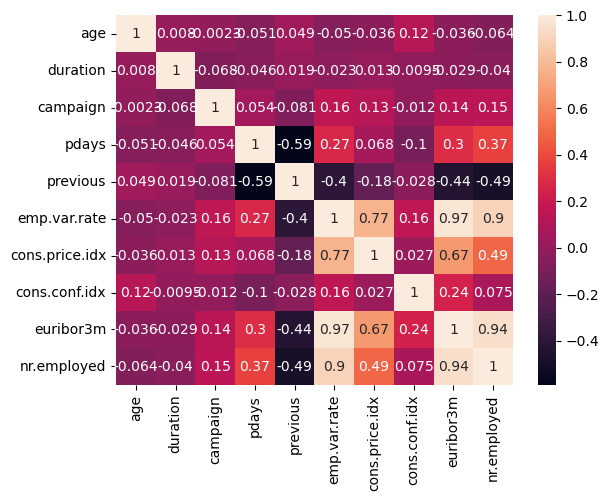

In [57]:
sns.heatmap(df2.corr(), annot=True)

In [58]:
# There seem to be many factors that are correlated with each other 
# like 'euribor3m' and 'emp.var.rate' or 'euribor3m' and 'nr.employed'
# thus, lets try to reduce dimensionality of the dataset 

In [59]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)
pd.DataFrame(pca.components_,columns = X_train.columns)
'''

'from sklearn.decomposition import PCA\npca = PCA(n_components = 3)\n \nX_train_pca = pca.fit_transform(X_train)\nX_test_pca = pca.transform(X_test)\n \nexplained_variance = pca.explained_variance_ratio_\nsum(explained_variance)\npd.DataFrame(pca.components_,columns = X_train.columns)\n'

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [61]:
df_opt = df

In [62]:
df_opt = df_opt[df_opt['marital']!='unknown']
df_opt = df_opt[df_opt['job']!='unknown']
df_opt = df_opt[df_opt['education']!='unknown']
df_opt = df_opt[df_opt['default']!='unknown']
df_opt = df_opt[df_opt['housing']!='unknown']
df_opt = df_opt[df_opt['loan']!='unknown']
df_opt = df_opt[df_opt['contact']!='unknown']

In [63]:
# creating a new instance of orignal dataframe for parameter optimzation 
df_opt = df.drop('y', axis =1)
y = df['y']
y = y.replace({'yes': 1, 'no':0})

In [64]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [65]:
# Transformer to convert Object datatype to 1/0 and numerical to Normalize
t = [('num', StandardScaler(),num_col),('cat',OneHotEncoder(), obj_col)]
col_transform = ColumnTransformer(transformers = t)

In [66]:
# creating test and training datasets for optimization
X_train, X_test, y_train, y_test = train_test_split(df_opt, y, test_size = 0.25)

In [67]:
# using Sequential Feature Selection to optimize linear optimization model  

In [68]:
feature_select = SequentialFeatureSelector(LinearRegression(), n_features_to_select = 7)

In [204]:
model = KNeighborsClassifier()
#model = tree.DecisionTreeClassifier()
#model = SVC()

In [205]:
pipe = Pipeline(steps=[('prep',col_transform), ('column_selector',feature_select),('m', model)])

In [206]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=7)),
                ('m', KNeighborsClassifier())])

In [161]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')

Train MSE:  0.08
Test MSE:  0.09


In [162]:
pipe.score(X_train,y_train)

0.9151609351725924

In [163]:
pipe.score(X_test,y_test)

0.9121818535068972

In [164]:
grid_score = grid_score.append({'Model':'svc_base',
                                'Train Time': 1,
                                'Train Accuracy': pipe.score(X_train,y_train),
                                'Test Accuracy':pipe.score(X_test,y_test)}, ignore_index = True)

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\422209677.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_score = grid_score.append({'Model':'svc_base',


In [208]:
# optimizing logistic regression parameters

# knn parameters for model tuning
k_range = [30,32,34,36,38,40] #knn params used'
params = {'m__n_neighbors' :k_range}  #knn params used'

#decision tree parameters for model tuning
#k_range = list(range(1,10))
#params = {'m__max_depth' : k_range, 'm__criterion':["gini", "entropy", "log_loss"]}
    
# SVC parameters for model tuning
#params = {'m__C': [0.1, 1, 10, 100],
#          'm__gamma': [1, 0.1, 0.01],
#          'm__kernel': ['rbf']}


In [209]:
grid_search = GridSearchCV(pipe, param_grid=params,cv =5, scoring="accuracy", n_jobs = -1)

In [210]:
import time
start = time.time()
grid_knn = grid_search.fit(X_train,y_train)
end = time.time()
grid_time = end - start

In [211]:
print(grid_knn.best_params_)

{'m__n_neighbors': 36}


In [181]:
print(grid_svc.best_params_)

{'m__C': 10, 'm__gamma': 1, 'm__kernel': 'rbf'}


In [183]:
grid_score.append({'Model':'svc_grid',
                            'Train Time': grid_time, 
                            'Train Accuracy': grid_svc.score(X_train,y_train), 
                            'Test Accuracy':grid_svc.score(X_test,y_test)},ignore_index = True)

C:\Users\a72016\AppData\Local\Temp\ipykernel_31224\1499488054.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_score.append({'Model':'svc_grid',


,Model,Train Time,Train Accuracy,Test Accuracy
0,knn_7feature,0.012411,0.932420,0.903633
1,[dts],1.000000,0.975034,0.888964
2,svc_base,1.000000,0.915161,0.912182
3,svc_grid,0.012411,0.920892,0.913445


In [188]:
precision_svc = precision_score(y_train, grid_dt.predict(X_train))

In [189]:
precision_svc

0.7015873015873015

In [190]:
recall_svc = recall_score(y_train, grid_dt.predict(X_train))

In [191]:
recall_svc

0.511130384504192

In [200]:
precision_knn = precision_score(y_train, grid_knn.predict(X_train))
recall_knn = recall_score(y_train, grid_knn.predict(X_train))

In [201]:
precision_knn

0.7015873015873015

In [202]:
recall_knn

0.511130384504192

In [ ]:
# evaluate the pipeline using cross validation and calculate MAE
'''scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
# convert MAE scores to positive values
scores = absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
'''

##### Questions